Hotel Reservation Machine Learning. 

In [45]:
# Import all required libraries 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Viz. 
import matplotlib.pyplot as plt
import seaborn as sns 

#For Warnings
import warnings
warnings.filterwarnings('ignore')

#For Options 
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows', None)

#From Sklearn
from sklearn.model_selection import train_test_split 

#Model building 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier 

#Metric Evaluation 
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

#Hyper Parameter Tuning 
from sklearn.model_selection import GridSearchCV 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
filepath = 'Hotel Reservations.csv'
data_import = pd.read_csv(filepath) 

data_import.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [17]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [18]:
def duplicated_func(df) : 
    
    print(f"Total number of duplicated rows in data are: {df.duplicated().sum()}")


duplicated_func(data_import)

Total number of duplicated rows in data are: 0


In [19]:
def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
    else : 
        print("No missing columns.")

missing_vals(data_import)



No missing columns.


In [20]:
df =  data_import.copy()

In [21]:
# Drop Booking_ID . 


df.drop('Booking_ID' , axis = 1 , inplace = True)


In [22]:
def cat_cols(df) : 
    o = (df.dtypes == 'object')
    object_cols = o[o].index 
    return object_cols

object_cols = cat_cols(df)
print(f"Categorical Columns are : {object_cols}")

Categorical Columns are : Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


In [23]:
def unique_vals(df) : 
    for i in object_cols : 
        print(f"{i}: {df[i].unique()}")
        
unique_vals(df)

type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status: ['Not_Canceled' 'Canceled']


In [27]:

df1  = pd.get_dummies( data = df, columns = ['type_of_meal_plan' , 'room_type_reserved' , 'market_segment_type' ] , drop_first = True )

In [30]:
df1['booking_status'] = df1['booking_status'].map({'Not_Canceled' : 0 , 'Canceled' : 1 })

In [31]:
df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [33]:
features = df1.drop('booking_status' , axis = 1)
label = df1['booking_status']

In [35]:
def splitted_data(features , label) : 
    x_train,x_test,y_train,y_test = train_test_split(features, label , test_size = 0.3)
    
    print(f"Shape of x_train : {x_train.shape}")
    print(f"Shape of y_train : {y_train.shape}")
    print(f"Shape of x_test : {x_test.shape}")
    print(f"Shape of y_test: {y_test.shape}")
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = splitted_data(features , label)

Shape of x_train : (25392, 27)
Shape of y_train : (25392,)
Shape of x_test : (10883, 27)
Shape of y_test: (10883,)


In [37]:
pred_dict = {} 

def model(modelname , x_train  , x_test , y_train , y_test) : 
    
    model_build = modelname(random_state = 42)
    model_build.fit(x_train,y_train)
    
    y_pred = model_build.predict(x_test) 
    
    return y_pred 

y_pred = model(LogisticRegression, x_train,x_test,y_train,y_test)
pred_dict['Logistic_y_pred'] = y_pred 

y_pred = model(GradientBoostingClassifier , x_train,x_test,y_train,y_test)
pred_dict['Gradientboosting_y_pred'] = y_pred 

y_pred = model(DecisionTreeClassifier , x_train,x_test,y_train,y_test)
pred_dict['DecisionTree_y_pred'] = y_pred

y_pred = model(SVC , x_train ,x_test ,y_train , y_test)
pred_dict['svc_y_pred'] = y_pred 

y_pred = model(RandomForestClassifier , x_train ,x_test , y_train , y_test)
pred_dict['forest_y_pred'] = y_pred 


In [40]:

metrics_dict = {}
def classification_metrics (y_test , y_pred) : 
    
    acc_score = accuracy_score(y_test,y_pred)
    print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
    
    return acc_score 
    
metrics_dict['Log_acc_score'] = classification_metrics(y_test,pred_dict['Logistic_y_pred'])
metrics_dict['Gradientboosting_acc_score'] = classification_metrics(y_test,pred_dict['Gradientboosting_y_pred'])
metrics_dict['DecisionTree_acc_score'] = classification_metrics(y_test,pred_dict['DecisionTree_y_pred'])
metrics_dict['forest_acc_score'] = classification_metrics(y_test,pred_dict['forest_y_pred'])
metrics_dict['svc_acc_score'] = classification_metrics(y_test,pred_dict['svc_y_pred'])



Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7344
           1       0.73      0.62      0.67      3539

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883

Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7344
           1       0.82      0.71      0.76      3539

    accuracy                           0.86     10883
   macro avg       0.85      0.82      0.83     10883
weighted avg       0.85      0.86      0.85     10883

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7344
           1       0.79      0.80      0.80      3539

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883

Random Forest Classifier has showed better metrics than other models. 

In [42]:
# Let's use some hyperparameter tuning for random forest classifier


rf_classifier = RandomForestClassifier(random_state = 42) 

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv_rf = GridSearchCV(rf_classifier,param_grid) 

cv_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [43]:
print(f'Best Parameters: {cv_rf.best_params_} and \nBest Score Params: {cv_rf.best_score_}')


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200} and 
Best Score Params: 0.8541271230819302


Look's like our previous random forest performed better than cv_rf model.

<AxesSubplot:>

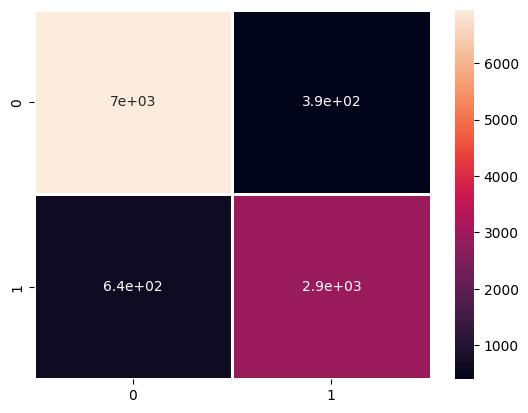

In [46]:
cm = confusion_matrix(y_test,pred_dict['forest_y_pred']) 

sns.heatmap(cm,annot = True ,linewidth = 1)

In [44]:
import pickle 

with open("forest_model.pkl" , 'wb') as f :
    pickle.dump(model(RandomForestClassifier , x_train ,x_test , y_train , y_test) , f) 